In [23]:
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter  # 导入tensorboard的类

# 定义神经网络模型
net = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 2)
)

# 定义损失函数
criterion = nn.CrossEntropyLoss()

# 定义输入输出数据
input = torch.randn(32, 10)
target = torch.randint(2, (32,), dtype=torch.long)

# 定义优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# 定义SummaryWriter，log_dir是日志文件存储路径
writer = SummaryWriter(log_dir='/home/leyuquan/projects/LegalNLU/logs/tensorboard_logs/test')

# 将模型结构写入 TensorBoard。TODO: 输入不为tensor是否也可以显示模型结构？
writer.add_graph(net, torch.zeros([1, 10]))

# 训练过程
for epoch in range(100):
    output = net(input)
    loss = criterion(output, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录训练集的step loss数据到tensorboard
    writer.add_scalar('train_loss', loss.item(), epoch)

# 关闭SummaryWriter
writer.close()

# 页面启动tensorboard命令：tensorboard --logdir=/path/to/log --host=localhost --port=6606 --samples_per_plugin images=999 

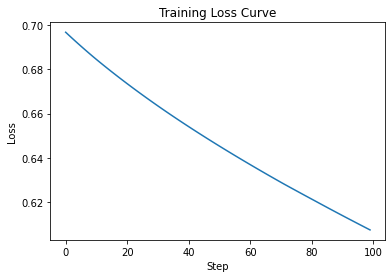

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# 定义函数，从 TensorBoard 日志文件中读取 scalar 数据
def load_event_file(log_path):
    event_acc = EventAccumulator(log_path)
    event_acc.Reload()
    tags = event_acc.Tags()['scalars']
    data = {'steps': [], 'values': []}
    for tag in tags:
        events = event_acc.Scalars(tag)
        data['steps'].append([event.step for event in events])
        data['values'].append([event.value for event in events])
    return data

# 从 TensorBoard 日志文件中读取数据
log_path = '/home/leyuquan/projects/LegalNLU/logs/tensorboard_logs/test'
data = load_event_file(log_path)
steps = np.concatenate(data['steps'], axis=0)
loss = np.concatenate(data['values'], axis=0)

# 使用 matplotlib 绘制 loss 下降的图形
plt.plot(steps, loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.savefig('/home/leyuquan/projects/LegalNLU/logs/tensorboard_logs/test/loss.png', dpi=300, bbox_inches='tight')
